In [1]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
sns.set()

/home/aditya/Documents/SOMBL


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
# pspace = [(c, w) for w in [10, 11, 12] for c in [1.5, 1.6, 1.7]]
# pspace += [(c, w) for w in [13, 14, 15] for c in [0.3, 0.4, 0.5]]


pspace = [(c, w) for c in np.arange(0, 2.01, 0.1) for w in range(8, 18+1)]
pspace += [(c, w) for c in np.arange(2.1, 2.51, 0.1) for w in range(12, 18+1)]
# pspace = []
# pspace += [(0.0, w) for w in range(8, 18+1)]
# pspace += [(0.1, w) for w in [8, 14, 15, 16, 17, 18]]
# pspace += [(0.2, w) for w in range(8, 18+1)]
# pspace += [(0.3, w) for w in range(8, 18+1)]
# pspace += [(0.4, w) for w in [8, 12, 14, 16, 17, 18]]
# pspace += [(0.5, w) for w in [8, 9, 10, 11, 12, 14, 15, 16, 17, 18]]
# pspace += [(0.6, w) for w in range(8, 18+1)]
# pspace += [(0.7, w) for w in range(8, 18+1)]
# pspace += [(0.8, w) for w in range(8, 18+1)]
# pspace += [(0.9, w) for w in range(8, 18+1)]
# pspace += [(1.0, w) for w in range(8, 18+1)]
# pspace += [(1.2, w) for w in range(8, 18+1)]
# pspace += [(1.3, w) for w in range(8, 18+1)]
# pspace += [(1.4, w) for w in range(8, 18+1)]
# pspace += [(1.5, w) for w in range(8, 18+1)]
# pspace += [(1.6, w) for w in range(8, 18+1)]
# pspace += [(1.7, w) for w in range(8, 18+1)]
# pspace += [(1.8, w) for w in []]
# pspace += [(1.9, w) for w in range(9, 18+1)]
# pspace += [(2.0, w) for w in range(9, 18+1)]
for i in range(len(pspace)):
    c, w = pspace[i]
    print(f"({c:5.1f},{w:5}), ", end="")
    if (i + 1) % 5 == 0:
        print()
        

(  0.0,    8), (  0.0,    9), (  0.0,   10), (  0.0,   11), (  0.0,   12), 
(  0.0,   13), (  0.0,   14), (  0.0,   15), (  0.0,   16), (  0.0,   17), 
(  0.0,   18), (  0.1,    8), (  0.1,    9), (  0.1,   10), (  0.1,   11), 
(  0.1,   12), (  0.1,   13), (  0.1,   14), (  0.1,   15), (  0.1,   16), 
(  0.1,   17), (  0.1,   18), (  0.2,    8), (  0.2,    9), (  0.2,   10), 
(  0.2,   11), (  0.2,   12), (  0.2,   13), (  0.2,   14), (  0.2,   15), 
(  0.2,   16), (  0.2,   17), (  0.2,   18), (  0.3,    8), (  0.3,    9), 
(  0.3,   10), (  0.3,   11), (  0.3,   12), (  0.3,   13), (  0.3,   14), 
(  0.3,   15), (  0.3,   16), (  0.3,   17), (  0.3,   18), (  0.4,    8), 
(  0.4,    9), (  0.4,   10), (  0.4,   11), (  0.4,   12), (  0.4,   13), 
(  0.4,   14), (  0.4,   15), (  0.4,   16), (  0.4,   17), (  0.4,   18), 
(  0.5,    8), (  0.5,    9), (  0.5,   10), (  0.5,   11), (  0.5,   12), 
(  0.5,   13), (  0.5,   14), (  0.5,   15), (  0.5,   16), (  0.5,   17), 
(  0.5,   18

In [4]:
pattern = "alt_up_down"
length = 100
# totalbins = 50
# densities = get_densities(length, 0.3, 15, -1, pattern)
# initial_cond = putils.get_initial_condition(pattern, length)
# print(calculate_imbalance(densities[0], initial_cond, length))

In [5]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [6]:
def get_densities(length, coupling, disorder, binnum, pattern):
    prefix = "data/mbl_density"
    totalbins = 0
    kwargs = {
        "size": length,
        "coupling": coupling,
        "disorder": disorder,
        "hopup": 1.0,
        "hopdn": 1.0,
        "runs": 100,
        "nospin": False,
        "binnum": 2,
        "alpha": 0,
        "beta": 0
    }
    # params = putils.SystemParams(**kwargs)
    GR_GRstar = pdens.calculate(kwargs, totalbins, prefix, pattern)
    densities = pdens.get_final_densities(GR_GRstar, binnum)
    return densities

In [7]:
def calculate_spin_imbalance(density, initial_cond, length, norm=None):
    upList, downList = initial_cond
    imb = 0
    if upList is not None:
        for index in upList:
            x = index % length
            y = index // length
            imb += 1 * density[x, y]
            
    if downList is not None:
        for index in downList:
            x = index % length
            y = index // length
            imb += -1 * density[x, y]
    if norm is None:
        imb /= np.sum(density)
    else:
        imb /= norm
    return imb

In [8]:
def calculate_imbalance(density, length, setA, norm=None):
    imb = 0
    sorted_setA = sorted(setA)
    for x in range(length):
        for y in range(length):
            index = x + length*y
            if index not in setA:
                imb -= density[x, y]
    for index in setA:
        x = index % length
        y = index // length
        imb += density[x, y]

    if norm is None:
        imb /= np.sum(density)
    else:
        imb /= norm

    return imb

## Charge Imbalance
For charge imbalance $A$ is the whole lattice for the alternating up-down pattern. So all the imbalances are expected to be $1$.

In [9]:
def calculate_charge_imbalances_df(pattern, length, pspace):
    upList, downList = putils.get_initial_condition(pattern, length)
    # For charge imbalance
    if upList is None:
        upList = []
    if downList is None:
        downList = []
    setA = list(upList) + list(downList)

    data = []
    for coupling, disorder in pspace:
        print(f"α = {coupling} W = {disorder}")
        binnum = -1
        densities = get_densities(length, coupling, disorder, binnum, pattern)
        charge_density = densities[0] + densities[1]
        datapoint = {
            "coupling": coupling,
            "disorder": disorder,
            "binnum": binnum,
            "imb_n_up": calculate_imbalance(densities[0], length, setA),
            "imb_n_down": calculate_imbalance(densities[1], length, setA),
            "imb_S_plus": calculate_imbalance(densities[2], length, setA),
            "imb_S_minus": calculate_imbalance(densities[3], length, setA),
            "imb_charge": calculate_imbalance(charge_density, length, setA)
        }
        data.append(datapoint)

    df = pd.DataFrame(data)
    return df

In [10]:
#df = calculate_charge_imbalances_df(pattern, length, pspace)
#df.to_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")
#df

In [11]:
#df = pd.read_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")
#df

In [12]:
#sns.relplot

## Spin Imbalance
We can ask for spin imbalance in three different ways:
1. Spin Up Imbalance $A = {sites\ where\ }$

In [13]:
def calculate_spin_imbalances_df(pattern, length, pspace):
    upList, downList = putils.get_initial_condition(pattern, length)
    # For charge imbalance
    if upList is None:
        upList = []
    if downList is None:
        downList = []
    setAup = list(upList)
    setAdown = list(downList)

    data = []
    for coupling, disorder in tqdm(pspace):
        # print(f"α = {coupling} W = {disorder}")
        binnum = -1
        densities = get_densities(length, coupling, disorder, binnum, pattern)
        n_up, n_down, S_plus, S_minus = densities
        S_x = (S_plus + S_minus)/2
        S_y = -1j*(S_plus - S_minus)/2
        S_z = n_up - n_down
        charge = n_up + n_down
        norm = len(setAup)
        datapoint = {
            "coupling": coupling,
            "disorder": disorder,
            "binnum": binnum,
            "spin_up_imb_n_up": calculate_imbalance(n_up, length, setAup),
            "spin_up_imb_n_down": calculate_imbalance(n_down, length, setAup),
            "spin_up_imb_S_plus": calculate_imbalance(S_plus, length, setAup, norm=norm),
            "spin_up_imb_S_minus": calculate_imbalance(S_minus, length, setAup, norm=norm),
            "spin_up_imb_charge": calculate_imbalance(charge, length, setAup),
            "spin_up_imb_S_x": calculate_imbalance(S_x, length, setAup, norm=norm),
            "spin_up_imb_S_y": calculate_imbalance(S_y, length, setAup, norm=norm),
            "spin_up_imb_S_z": calculate_imbalance(S_z, length, setAup, norm=norm)            
        }
        data.append(datapoint)

    df = pd.DataFrame(data)
    return df

In [14]:
df = calculate_spin_imbalances_df(pattern, length, pspace)
df.to_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")

 94%|█████████████████████████████████████████████████████████████▎   | 251/266 [06:04<00:21,  1.45s/it]


FileNotFoundError: data/mbl_density_100x100_W18_C2.3_TU1_TD1_N100_a0_b0_full_alt_up_down.dat not found.

In [36]:
df = pd.read_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")
complex_types = {
    'spin_up_imb_S_plus': complex,
    'spin_up_imb_S_minus': complex,
    'spin_up_imb_S_x': complex,
    'spin_up_imb_S_y': complex,
    'spin_up_imb_S_z': complex
}
df = df.astype(complex_types)

In [37]:
df

,Unnamed: 0,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_up_imb_S_x,spin_up_imb_S_y,spin_up_imb_S_z
0,0,0.0,8,-1,0.034204,-0.034204,-1.996462e-21+0.000000e+00j,-1.996462e-21+0.000000e+00j,-9.979115e-12,-1.996462e-21+0.000000e+00j,0.000000+0.000000j,0.068407+0.000000j
1,1,0.0,9,-1,0.053315,-0.053315,8.682698e-20+0.000000e+00j,8.682698e-20+0.000000e+00j,1.283941e-10,8.682698e-20+0.000000e+00j,0.000000+0.000000j,0.106630+0.000000j
2,2,0.0,10,-1,0.075409,-0.075409,-2.616409e-20+0.000000e+00j,-2.616409e-20+0.000000e+00j,-3.089778e-10,-2.616409e-20+0.000000e+00j,0.000000+0.000000j,0.150818+0.000000j
3,3,0.0,11,-1,0.097813,-0.097813,7.641541e-21+0.000000e+00j,7.641541e-21+0.000000e+00j,4.907097e-10,7.641541e-21+0.000000e+00j,0.000000+0.000000j,0.195626+0.000000j
4,4,0.0,12,-1,0.124542,-0.124542,-3.379285e-20+0.000000e+00j,-3.379285e-20+0.000000e+00j,6.441449e-10,-3.379285e-20+0.000000e+00j,0.000000+0.000000j,0.249084+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,2.0,14,-1,0.018957,-0.018957,6.332884e-06+1.875984e-05j,6.332884e-06-1.875984e-05j,1.414940e-07,6.332884e-06+0.000000e+00j,0.000019+0.000000j,0.037914+0.000000j
227,227,2.0,15,-1,0.024215,-0.024216,5.775077e-06-4.752038e-05j,5.775077e-06+4.752038e-05j,-1.127366e-06,5.775077e-06+0.000000e+00j,-0.000048+0.000000j,0.048431+0.000000j
228,228,2.0,16,-1,0.030127,-0.030123,7.943315e-05+4.429339e-05j,7.943315e-05-4.429339e-05j,1.523676e-07,7.943315e-05+0.000000e+00j,0.000044+0.000000j,0.060250+0.000000j
229,229,2.0,17,-1,0.037647,-0.037647,2.650877e-05-1.040628e-04j,2.650877e-05+1.040628e-04j,-1.517787e-06,2.650877e-05+0.000000e+00j,-0.000104+0.000000j,0.075294+0.000000j


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.1'),
 Text(0, 2.5, '0.2'),
 Text(0, 3.5, '0.3'),
 Text(0, 4.5, '0.4'),
 Text(0, 5.5, '0.5'),
 Text(0, 6.5, '0.6'),
 Text(0, 7.5, '0.7'),
 Text(0, 8.5, '0.8'),
 Text(0, 9.5, '0.9'),
 Text(0, 10.5, '1.0'),
 Text(0, 11.5, '1.1'),
 Text(0, 12.5, '1.2'),
 Text(0, 13.5, '1.3'),
 Text(0, 14.5, '1.4'),
 Text(0, 15.5, '1.5'),
 Text(0, 16.5, '1.6'),
 Text(0, 17.5, '1.7'),
 Text(0, 18.5, '1.8'),
 Text(0, 19.5, '1.9'),
 Text(0, 20.5, '2.0')]

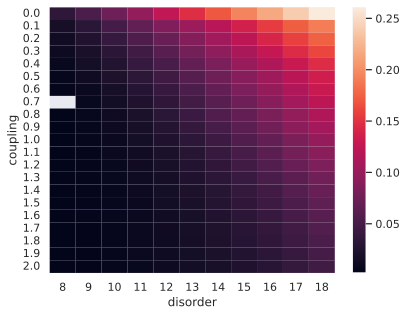

In [44]:
g = sns.heatmap(data=pd.pivot_table(data=df, index="coupling", columns="disorder", values="spin_up_imb_n_up"))
g.set_yticklabels([f"{c:.1f}" for c in np.arange(0, 2.01, 0.1)])

In [47]:
df.loc[np.abs(df["coupling"] - 0.7) < 1e-3]

,Unnamed: 0,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_up_imb_S_x,spin_up_imb_S_y,spin_up_imb_S_z
77,77,0.7,8,-1,NaN,NaN,N00000000a00000000N,N00000000a00000000N,NaN,N00000000a00000000N,N00000000a00000000N,N00000000a00000000N
78,78,0.7,9,-1,0.008093,-0.008093,0.000032-0.000021j,0.000032+0.000021j,-2.312752e-12,0.000032+0.000000j,-0.000021+0.000000j,0.016186+0.000000j
79,79,0.7,10,-1,0.014984,-0.014988,-0.000038+0.000123j,-0.000038-0.000123j,6.130190e-12,-0.000038+0.000000j,0.000123+0.000000j,0.029972+0.000000j
80,80,0.7,11,-1,0.024013,-0.024021,-0.000011-0.000006j,-0.000011+0.000006j,3.327670e-10,-0.000011+0.000000j,-0.000006+0.000000j,0.048034+0.000000j
81,81,0.7,12,-1,0.035350,-0.035350,-0.000003-0.000017j,-0.000003+0.000017j,-9.336483e-11,-0.000003+0.000000j,-0.000017+0.000000j,0.070700+0.000000j
82,82,0.7,13,-1,0.048160,-0.048156,-0.000080+0.000213j,-0.000080-0.000213j,-1.505850e-09,-0.000080+0.000000j,0.000213+0.000000j,0.096317+0.000000j
83,83,0.7,14,-1,0.060972,-0.061024,-0.000386-0.000228j,-0.000386+0.000228j,1.738196e-10,-0.000386+0.000000j,-0.000228+0.000000j,0.121997+0.000000j
84,84,0.7,15,-1,0.075438,-0.075485,-0.000092-0.000015j,-0.000092+0.000015j,1.232706e-06,-0.000092+0.000000j,-0.000015+0.000000j,0.150923+0.000000j
85,85,0.7,16,-1,0.090940,-0.090954,-0.000009+0.000149j,-0.000009-0.000149j,-2.834539e-06,-0.000009+0.000000j,0.000149+0.000000j,0.181894+0.000000j
86,86,0.7,17,-1,0.106551,-0.106589,-0.000066+0.000235j,-0.000066-0.000235j,1.381368e-06,-0.000066+0.000000j,0.000235+0.000000j,0.213141+0.000000j


In [18]:
imbalances_real = ["spin_up_imb_n_up", "spin_up_imb_n_down",  "spin_up_imb_charge",
                   "spin_up_imb_S_x", "spin_up_imb_S_y", "spin_up_imb_S_z"]
imbalances_complex = ["spin_up_imb_S_plus",
            "spin_up_imb_S_minus", "spin_down_imb_S_plus", "spin_down_imb_S_minus",]
imbalances_considered = ["spin_up_imb_n_up"] #, "spin_down_imb_n_down"]

In [21]:
binnum = -1
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 5))
for i, imb in enumerate(imbalances_considered):
    # ax = axes.flatten()[i]
    ax = axes
    pivoted = pd.pivot_table(data=df.loc[df["binnum"]==binnum], index="coupling",
                            columns="disorder", values=imb)
    cbar_kwargs = colorbar_kwargs.copy()
    # vmin = pivoted.min().min()
    # vmax = pivoted.max().max()
    vmin = 1e-5
    vmax = 1e0
    # print(vmin, vmax)
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    # cbar_kwargs["ticks"] = np.logspace(0, -3, 4)
    sns.heatmap(data=pivoted, ax=ax, cbar_kws=cbar_kwargs, norm=norm, annot=True, fmt=".2e")
    ax.set_title(imb)
    # ax.set_yticklabels([f"{c:.1f}" for c in np.arange(1.2, 1.71, 0.1)][::-1])
fig.suptitle(f"Bin {binnum}")
fig.tight_layout()

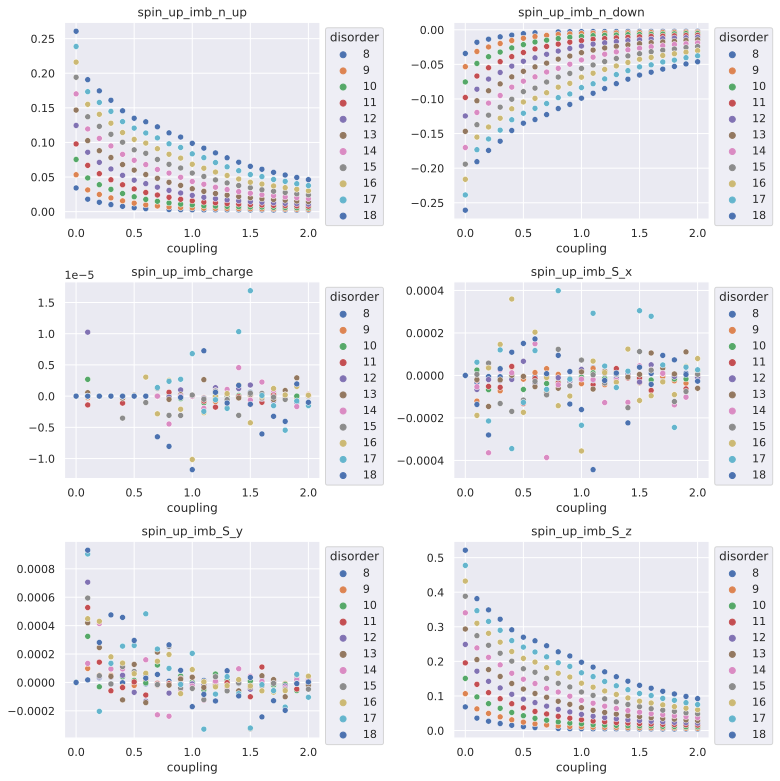

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for i, imb in enumerate(imbalances_real):
    ax = axes.flatten()[i]
    # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
    sns.scatterplot(data=df, x="coupling", y=np.real(df[imb]), hue="disorder", ax=ax, palette="deep")
    # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
    # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(imb)
fig.tight_layout()

In [21]:
fig, ax = plt.subplots()
# sns.set_style("darkgrid")
# sns.set_palette("Reds")
# sns.set_palette("")
# data = 
data = df.loc[df["disorder"].isin([8,])]
x = data["coupling"]
y = data["spin_up_imb_n_up"]
# sns.scatterplot(data=, x="coupling", y="spin_up_imb_n_up", hue="#fffffff", cmap="viridis", ax=ax)
ax.scatter(x, y, color="red")

data = df.loc[df["disorder"].isin([12,])]
x = data["coupling"]
y = data["spin_up_imb_n_up"]
ax.scatter(x, y, color="blue")

data = df.loc[df["disorder"].isin([16,])]
x = data["coupling"]
y = data["spin_up_imb_n_up"]
ax.scatter(x, y, color="green")


# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_yscale("log")

In [22]:
data = df.loc[df["coupling"] == 0.5]
# data = df.loc[df["disorder"].isin([16,])]
x = data["disorder"]
y = data["spin_up_imb_n_up"]
plt.scatter(x, y, color="green")

# sns.scatterplot(data=data, x="disorder", y="spin_up_imb_n_up")


In [23]:
0.6**6

0.04665599999999999

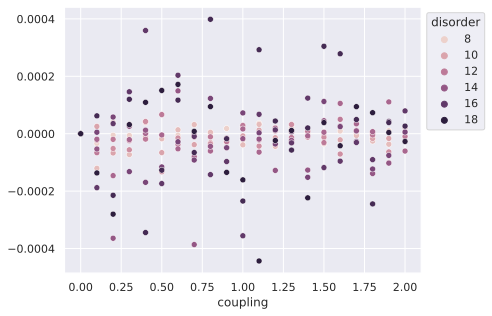

In [52]:
fig, ax = plt.subplots()
# print(df["spin_up_imb_S_x"])
data = df
sns.scatterplot(data=data, x="coupling", y=np.real(data["spin_up_imb_S_x"]), hue="disorder", ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_yscale("log")

In [25]:
y = np.real(df["spin_up_imb_S_y"])
# print(df["spin_up_imb_S_y"])
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="coupling", y=y, hue="disorder", ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_ylim(-20, 20)
# ax.set_yscale("log")

In [26]:

for disorder in [13, 14, 15]:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 11))
    # for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        # ax = axes.flatten()[i]
        ax = axes
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        cond = (loc_df["disorder"] == disorder)
        sns.scatterplot(data=loc_df.loc[cond], x="binnum", y=imb, hue="coupling", ax=ax)
        # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_yscale("log")
        ax.set_title(f"{imb} W = {disorder}")

    fig.tight_layout()
    filename = f"imbalances_60x60_W{disorder}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

NameError: name 'loc_df' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        ax = axes.flatten()[i]
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        sns.scatterplot(data=np.and(df.loc[df["binnum"]==binnumdf[]], x="coupling", y=imb, hue="disorder", ax=ax)
        ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_title(imb)
    fig.tight_layout()
    filename = f"imbalances_60x60_bin{binnum}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

In [ ]:
density = np.zeros((length,length))
for x in range(length):
    for y in range(length):
        index = x + length*y
        if(index in upList):
            density[x, y] += 1
        if(index in downList):
            density[x, y] += 1

print(density)
calculate_imbalance(density, length, setAup)

In [ ]:
n_up, n_down